In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import pickle
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
# PI(%): The column "PI(%)" represents the perfusion index derived from the photoplethysmography (PPG) signal. PPG is a 
#     non-invasive method that measures changes in blood volume in peripheral blood vessels. The perfusion index reflects 
#     the relative strength of the pulsatile signal in the PPG waveform and provides an indication of blood flow at the 
#     measurement site

# RR(rpm): The column "RR(rpm)" represents the respiratory rate derived from the electrocardiography (ECG) signal. The ECG 
#     signal can provide information about the electrical activity of the heart, but it also contains components related to 
#     respiration.

# PVCs(/min): It refers to abnormal heartbeats that originate in the ventricles (the lower chambers of the heart) and occur 
#     earlier than expected in the regular heartbeat sequence.
    
# Signal_pleth: is most likely a waveform representing the photoplethysmography (PPG) signal. PPG is a non-invasive method 
#     that measures blood volume changes in peripheral blood vessels, typically using a sensor placed on the skin, such as 
#     the fingertip or earlobe

# Lead I: Lead I is obtained by placing one electrode on the left arm (typically on the inside of the wrist) and another 
#     electrode on the right arm (typically on the inside of the wrist as well). The electrical potential difference between 
#     these two electrodes provides a frontal view of the heart's electrical activity, specifically the electrical potential 
#     between the left and right sides of the heart.

# Lead II: Lead II is obtained by placing one electrode on the left leg (typically on the lower part of the left leg) and 
#     another electrode on the right arm (typically on the inside of the wrist). The electrical potential difference between 
#     these two electrodes provides a diagonal view of the heart's electrical activity, specifically the electrical potential between the lower part of the heart and the right side of the heart.

# Lead III: Lead III is obtained by placing one electrode on the left leg (typically on the lower part of the left leg) and 
#     another electrode on the left arm (typically on the inside of the wrist). The electrical potential difference between 
#     these two electrodes provides another diagonal view of the heart's electrical activity, specifically the electrical 
#     potential between the lower part of the heart and the left side of the heart.

# PSG Abdomen: PSG Abdomen refers to the measurement of abdominal movement during sleep. It is typically recorded using a 
#     sensor placed on or near the abdomen. This signal provides information about the respiratory effort and movement of 
#     the abdominal muscles, which can help assess breathing patterns and identify abnormalities such as obstructive or 
#     central apneas.

# PSG Flow: PSG Flow refers to the measurement of nasal airflow during sleep. It is obtained using a sensor or thermistor 
#     placed near the nostrils or nasal passages. This signal helps to monitor the airflow through the nasal passages and 
#     detect any abnormalities or obstructions that may occur during sleep, such as nasal congestion or respiratory events.

# PSG Position: PSG Position refers to the monitoring of body position during sleep. It is typically recorded using sensors 
#     or detectors placed on various parts of the body, such as the back, chest, or limbs. This signal helps determine the 
#     position of the body during different sleep stages and can be useful in evaluating positional sleep disorders or 
#     assessing the impact of body position on respiratory events like positional obstructive sleep apnea.

# PSG Snore: PSG Snore refers to the measurement of snoring sounds during sleep. It is captured using specialized 
#     microphones or sensors placed near the throat or mouth. Snoring is a common symptom associated with sleep-disordered 
#     breathing, including obstructive sleep apnea. Monitoring snoring patterns during PSG can assist in evaluating the 
#     severity and frequency of snoring events.

# PSG Torax: PSG Torax refers to the measurement of thoracic (chest) movement during sleep. It is recorded using sensors or 
#     belts placed around the chest or ribcage. This signal provides information about the respiratory effort and movement 
#     of the chest wall, aiding in the evaluation of breathing patterns and the identification of respiratory abnormalities, 
#     such as apneas or hypopneas.   

In [3]:
# Path to the dataset (assuming it is in the same directory as the notebook)
path = 'dataset/dataset_OSAS.pickle'

# Loading the dataset
with open(path, 'rb') as file:
    dataset = pickle.load(file)
    
display(dataset.head())

display(dataset.dtypes)

,patient,timestamp_datetime,HR(bpm),SpO2(%),PI(%),RR(rpm),PVCs(/min),event,anomaly,signal_pleth,signal_ecg_i,signal_ecg_ii,signal_ecg_iii,PSG_Abdomen,PSG_Flow,PSG_Position,PSG_Snore,PSG_Thorax
0,1,2019-07-29 21:00:36,63.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[122, 121, 121, 120, 121, 123, 124, 125, 125, ...","[122, 121, 121, 120, 120, 122, 123, 124, 125, ...","[128, 128, 129, 128, 127, 127, 127, 128, 128, ...","[-0.8741500623767957, -0.9144675352463544, -0....","[-2.96563402995406, -2.9595796764374294, -2.95...","[-0.47401902530550133, -0.4739045513646679, -0...","[0.07924500093530636, 0.03509163903208667, 0.1...","[-0.3731332842321416, -0.3840816526328088, -0...."
1,1,2019-07-29 21:00:37,63.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 125, 125, 124, 124, 124, 124, 124, 124, ...","[123, 124, 123, 123, 123, 122, 123, 123, 123, ...","[127, 127, 127, 127, 127, 126, 127, 128, 127, ...","[-0.9881929400632088, -0.9477638031010281, -0....","[-1.361721983810798, -0.5937676928280333, 0.10...","[-0.47401917910760316, -0.4739043984870266, -0...","[0.1730628474409785, 0.05274774088651335, 0.07...","[-0.3271092235750278, -0.34422787330023297, -0..."
2,1,2019-07-29 21:00:38,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 124, 124, 124, 123, 124, 124, 124, 124, ...","[123, 124, 124, 124, 124, 124, 124, 124, 124, ...","[127, 128, 128, 128, 129, 128, 128, 128, 128, ...","[0.08614440036034249, 0.2516121296765992, 0.42...","[1.106683267015266, 1.0603761242579164, 1.0141...","[-0.4740193239619996, -0.47390425449218476, -0...","[0.17804040728101125, 0.11939900653197982, 0.1...","[-0.12950805941595078, -0.11899340882221601, -..."
3,1,2019-07-29 21:00:39,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 124, 124, 124, 123, 124, 123, 123, 124, ...","[126, 126, 126, 126, 126, 125, 126, 126, 126, ...","[130, 130, 130, 130, 131, 129, 131, 131, 131, ...","[1.1531959630520392, 1.1005866213221034, 1.014...","[-0.9214725025271104, -0.9771933825390473, -1....","[-0.4740194604923075, -0.4739041187620709, -0....","[0.04909074879934492, 0.1211243456818879, 0.20...","[0.014197466691675964, 0.05145753481049522, 0...."
4,1,2019-07-29 21:00:40,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[123, 124, 125, 124, 124, 124, 124, 124, 124, ...","[128, 127, 126, 125, 126, 127, 126, 125, 125, ...","[133, 131, 129, 129, 130, 131, 130, 130, 129, ...","[-0.42549812754662325, -0.5447443993201948, -0...","[-1.035218708573095, -1.0000002320633845, -0.9...","[-0.47401958926922777, -0.47390399073098, -0.4...","[0.020529048615559067, 0.5111613725192, 0.0863...","[-0.004534125269965855, -0.04243555140344553, ..."


patient                       object
timestamp_datetime    datetime64[ns]
HR(bpm)                      float64
SpO2(%)                      float64
PI(%)                        float64
RR(rpm)                      float64
PVCs(/min)                   float64
event                         object
anomaly                      boolean
signal_pleth                  object
signal_ecg_i                  object
signal_ecg_ii                 object
signal_ecg_iii                object
PSG_Abdomen                   object
PSG_Flow                      object
PSG_Position                  object
PSG_Snore                     object
PSG_Thorax                    object
dtype: object

In [4]:
len(dataset.iloc[0]["signal_ecg_i"])

80

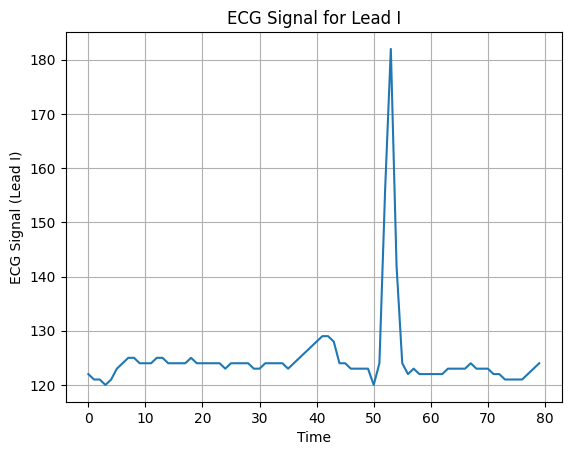

In [5]:
time = range(80)

# Plot the ECG waveform
plt.plot(time, dataset.iloc[0]["signal_ecg_i"])
plt.xlabel('Time')
plt.ylabel('ECG Signal (Lead I)')
plt.title('ECG Signal for Lead I')
plt.grid(True)
plt.show()

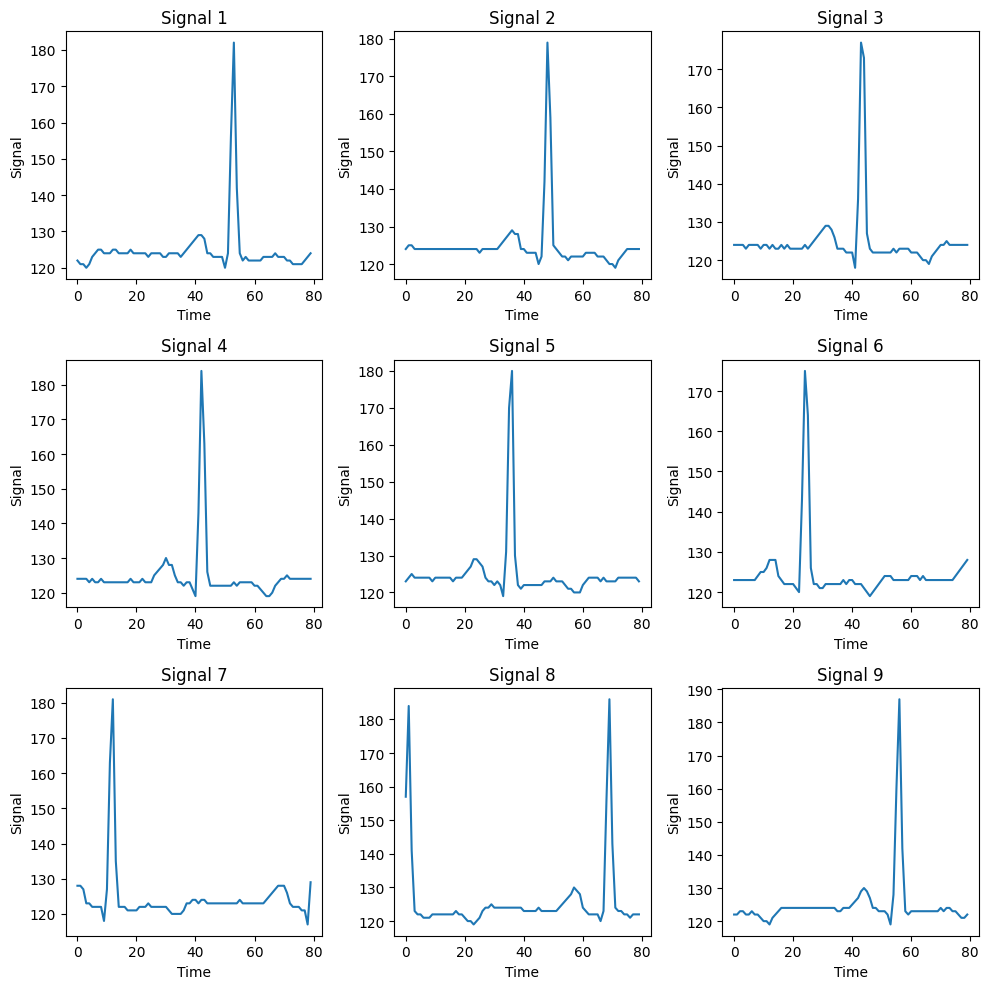

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["signal_ecg_i"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

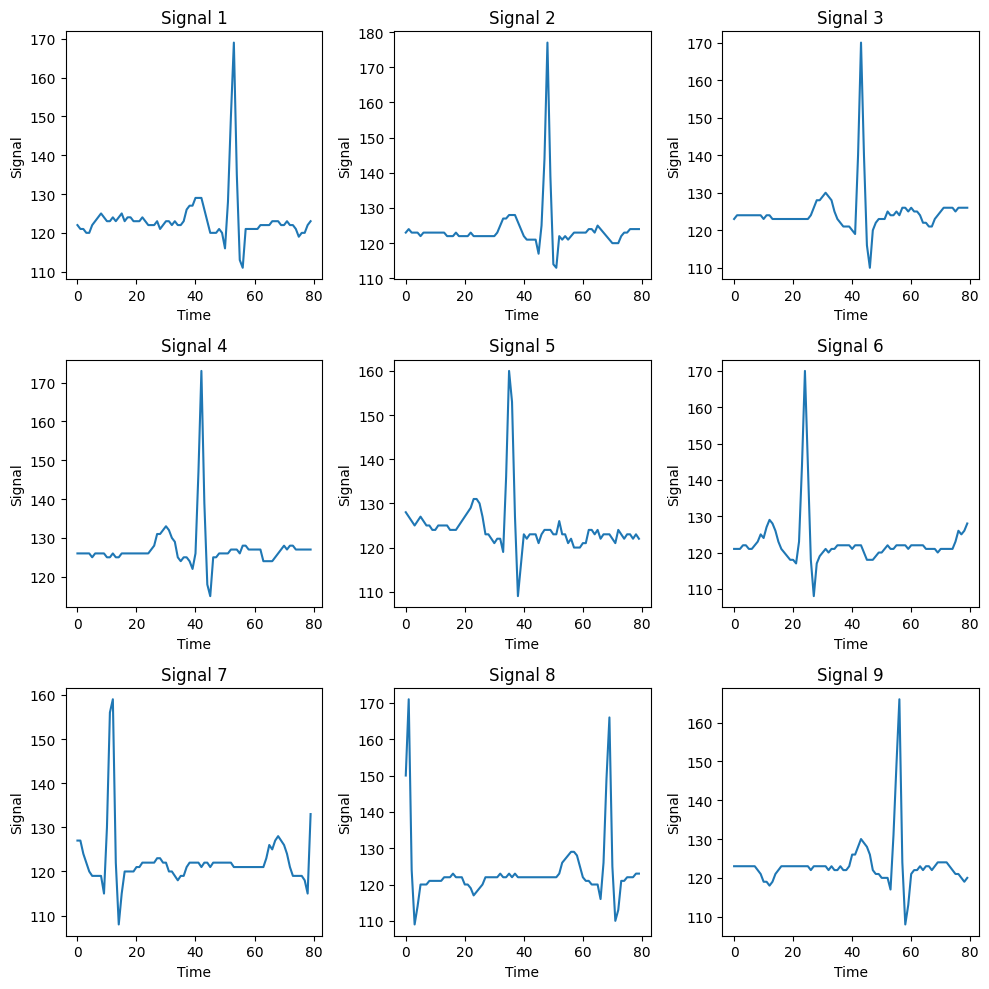

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["signal_ecg_ii"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

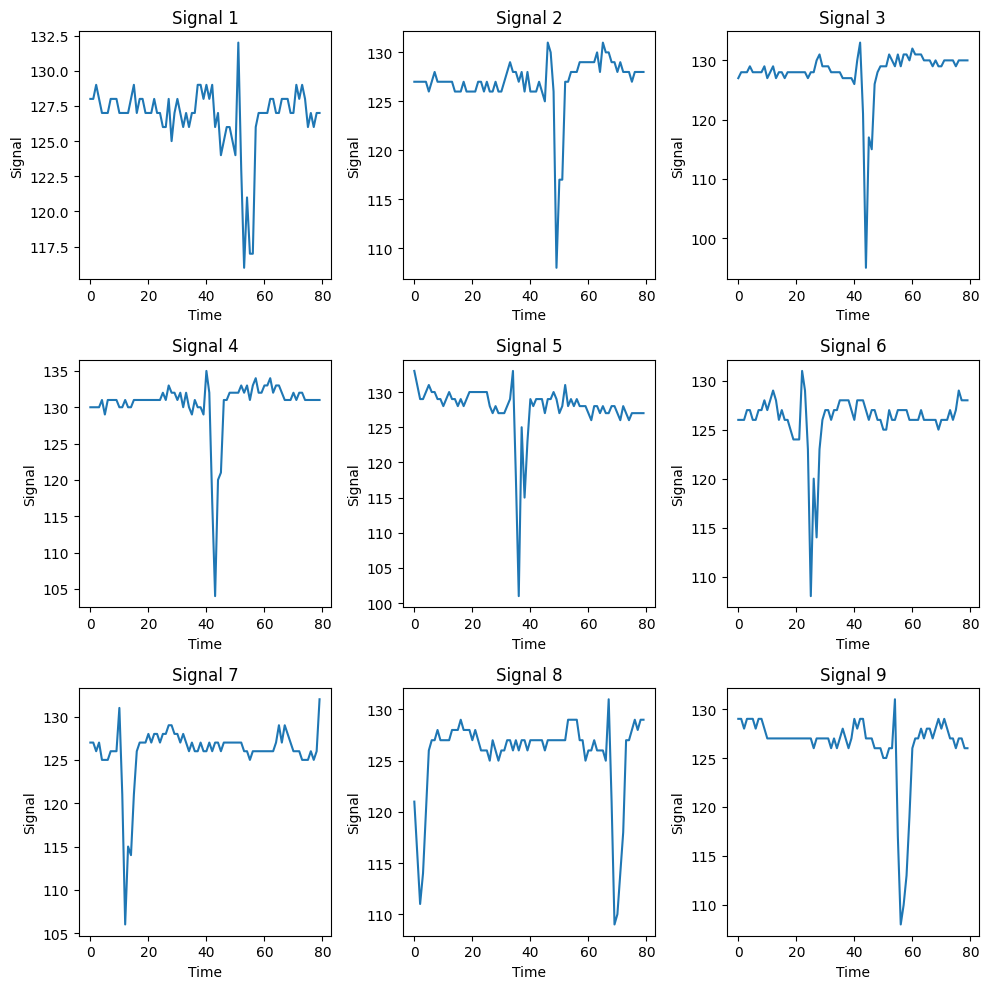

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["signal_ecg_iii"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

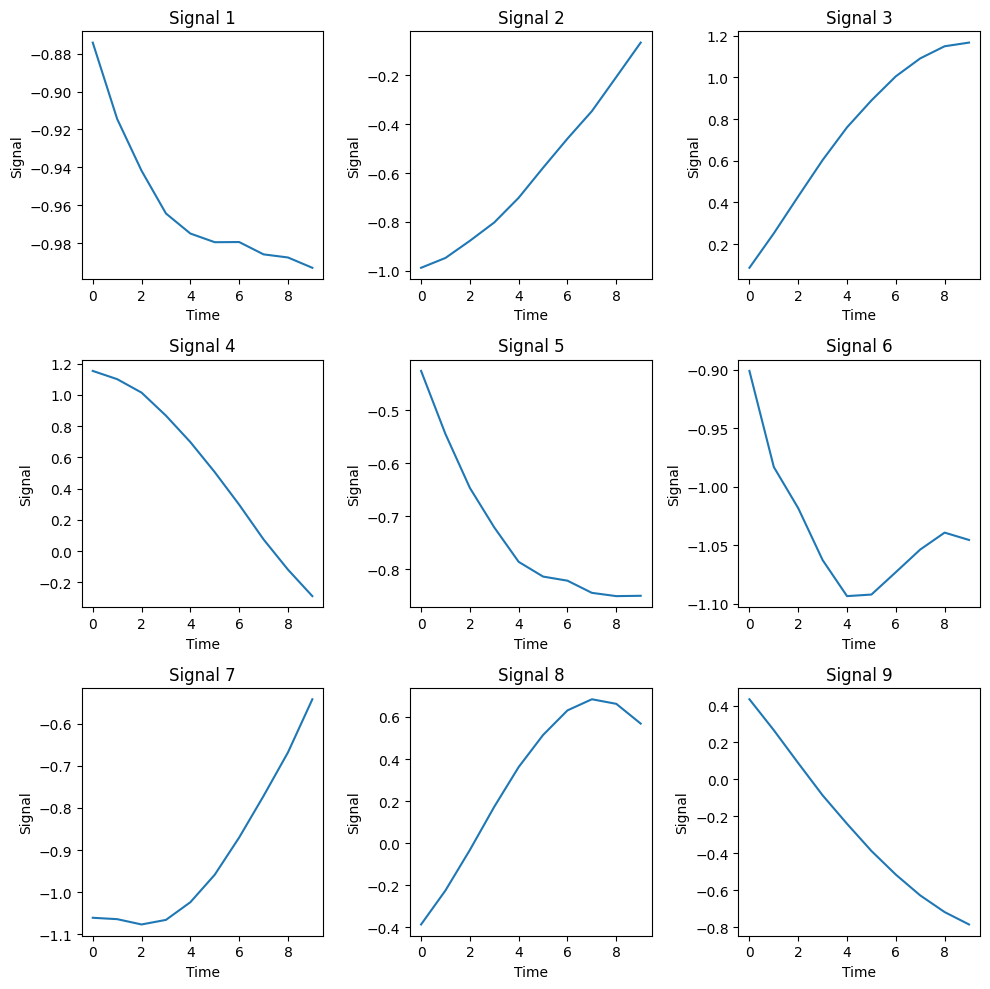

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["PSG_Abdomen"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# PSG_Abdomen                   object
# PSG_Flow                      object
# PSG_Position                  object
# PSG_Snore                     object
# PSG_Thorax

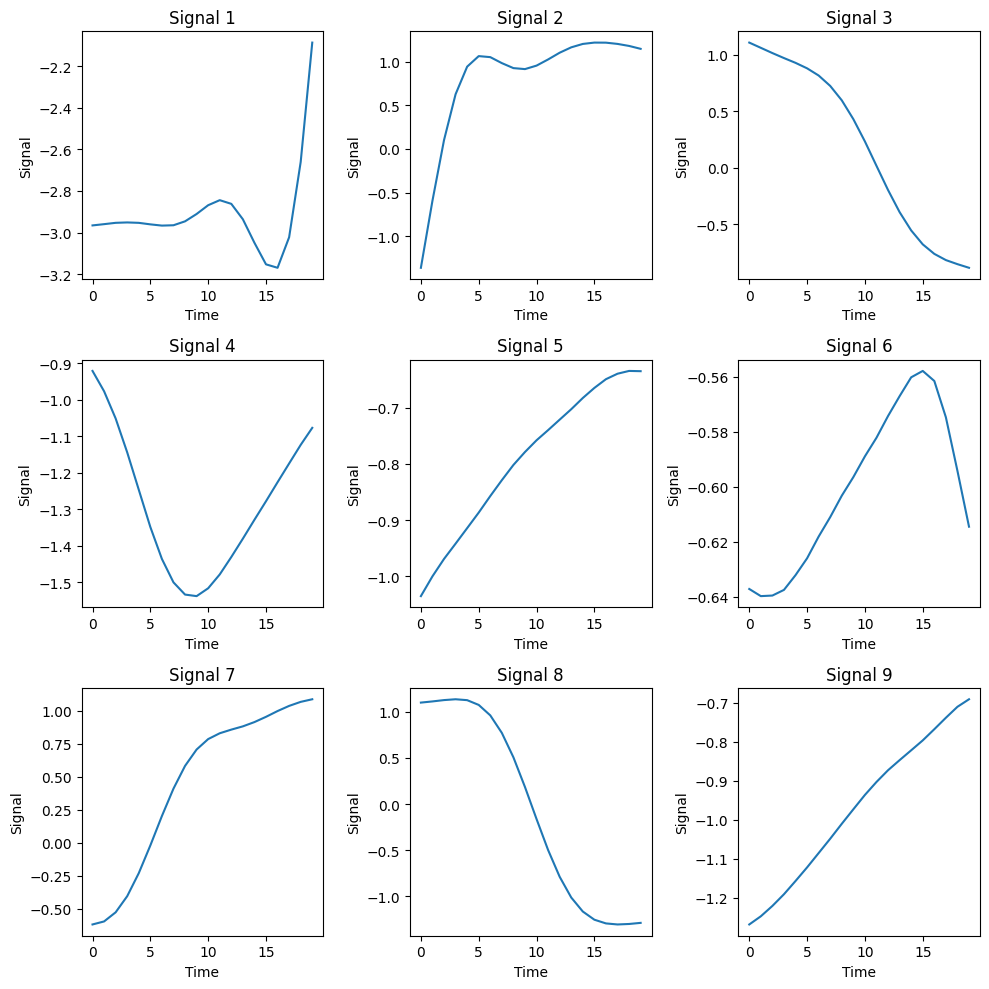

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["PSG_Flow"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# PSG_Abdomen                   object
# PSG_Flow                      object
# PSG_Position                  object
# PSG_Snore                     object
# PSG_Thorax

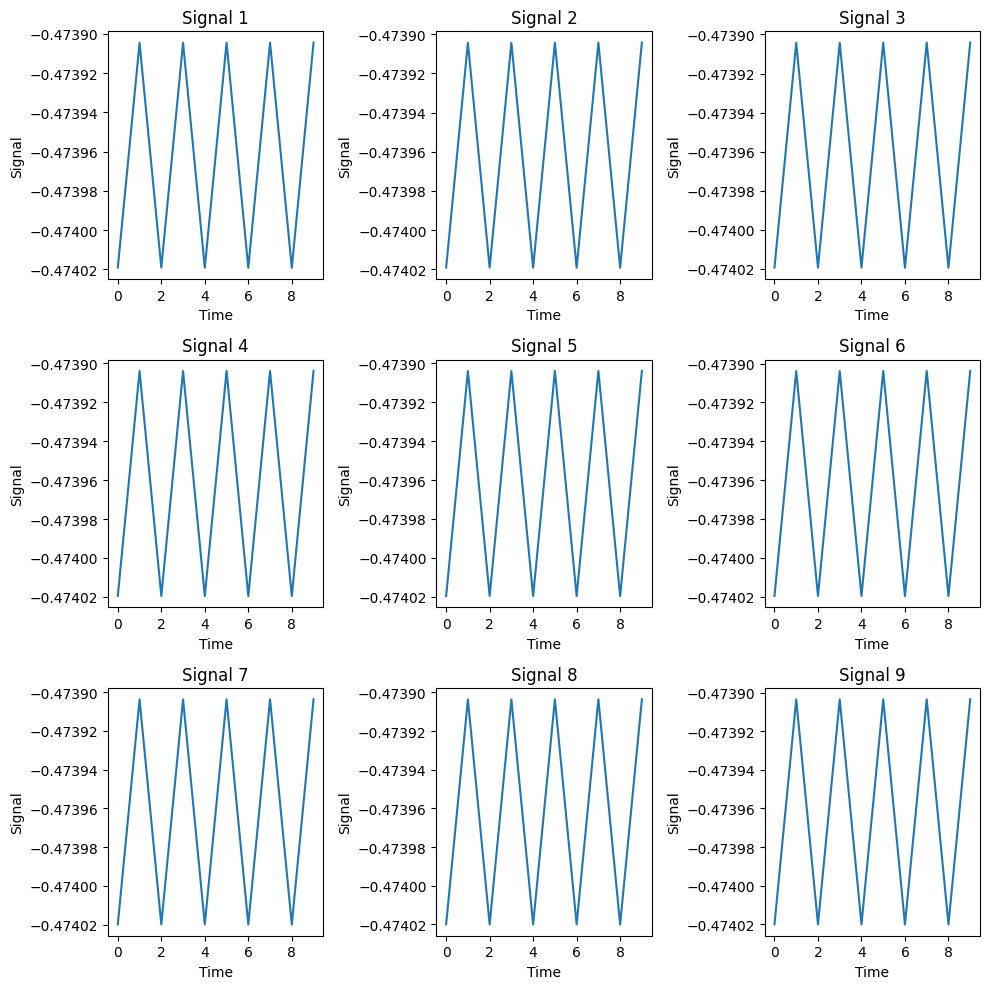

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["PSG_Position"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# PSG_Abdomen                   object
# PSG_Flow                      object
# PSG_Position                  object
# PSG_Snore                     object
# PSG_Thorax

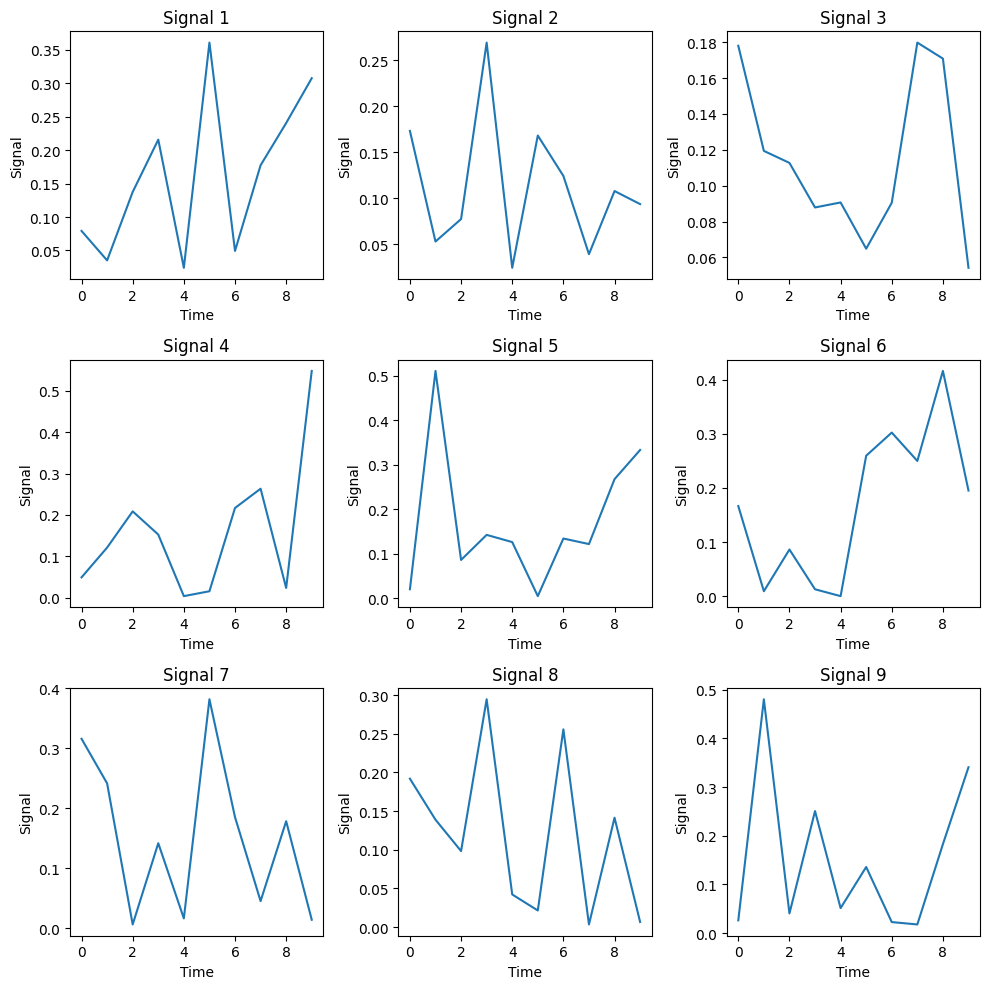

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["PSG_Snore"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# PSG_Abdomen                   object
# PSG_Flow                      object
# PSG_Position                  object
# PSG_Snore                     object
# PSG_Thorax

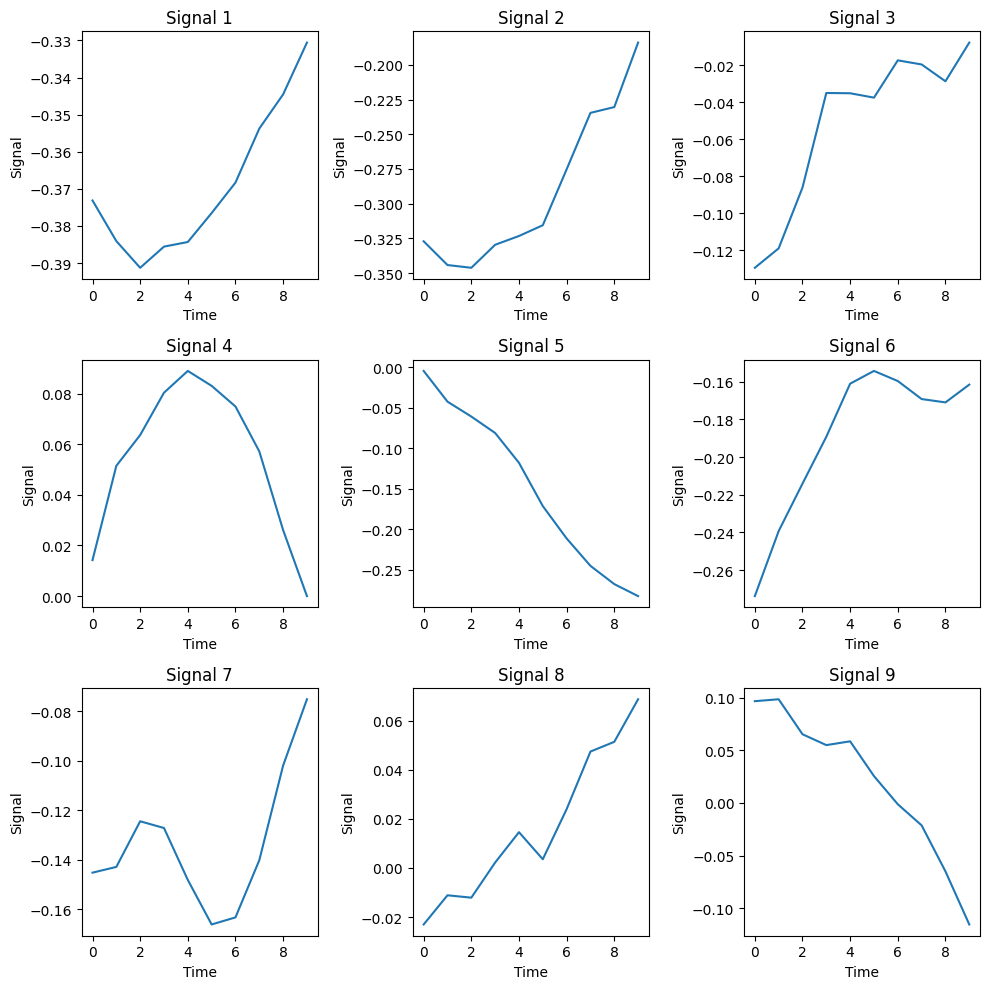

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the signal values and plot them in the corresponding subplot
i=0
for i in range(9):
    signal = dataset.iloc[i]["PSG_Thorax"]
    row = i // 3  # Row index of the subplot
    col = i % 3   # Column index of the subplot

    axs[row, col].plot(signal)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Signal')
    axs[row, col].set_title(f'Signal {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# PSG_Abdomen                   object
# PSG_Flow                      object
# PSG_Position                  object
# PSG_Snore                     object
# PSG_Thorax

In [3]:
dataset['event'].value_counts()

NONE                 815917
HYPOPNEA              78035
APNEA-OBSTRUCTIVE     44217
APNEA-MIXED           12360
APNEA-CENTRAL         10828
Name: event, dtype: int64

In [4]:
dataset['anomaly'].value_counts()

False    815917
True     145440
Name: anomaly, dtype: Int64

In [5]:
dataset.shape

(961357, 18)

In [6]:
for pat in np.unique(dataset['patient'])[np.argsort(np.unique(dataset['patient']).astype(np.int8))]:
    temp = dataset[dataset['patient'] == pat]
    print(pat, temp.shape)

1 (25178, 18)
2 (42877, 18)
3 (25682, 18)
4 (32477, 18)
5 (32741, 18)
6 (14610, 18)
7 (33148, 18)
8 (32397, 18)
9 (34156, 18)
10 (41058, 18)
11 (30400, 18)
12 (30146, 18)
13 (34036, 18)
14 (36920, 18)
15 (33105, 18)
16 (32360, 18)
17 (28987, 18)
18 (35875, 18)
19 (34151, 18)
20 (35233, 18)
21 (35150, 18)
22 (28952, 18)
23 (34086, 18)
24 (35432, 18)
25 (38018, 18)
26 (32393, 18)
27 (27512, 18)
28 (26762, 18)
29 (28138, 18)
30 (29377, 18)


In [19]:
temp = dataset[dataset['patient'] == '1']
print(temp.shape)

(25178, 18)


Number of rows: 961357
Number of columns: 18
Number of distinct patients: 30


Processed patients:   0%|          | 0/30 [00:00<?, ?it/s]

,patient,recording duration (hrs),AHI,# apnea events,# hypopnea events,avg duration (hypo)apnea events,stddev duration (hypo)apnea events,% null HR,% null SpO2,% null PI,% null RR,% null PVC,% null pleth,% null ecg i,% null ecg ii,% null ecg iii
0,1,7.0,39.7,142,136,22,8,0.0,8.3,8.5,0.0,0.0,8.2,0.0,0.0,0.0
1,2,11.9,10.2,29,93,20,8,0.0,6.1,6.1,0.0,0.0,6.1,0.3,0.0,53.8
2,3,7.1,63.1,242,208,25,10,0.0,0.2,0.4,2.7,0.0,0.0,0.0,0.0,0.0
3,4,9.0,10.4,52,42,34,15,0.3,0.2,0.3,0.7,0.3,0.2,1.4,0.2,1.4
4,5,9.1,35.4,42,280,23,12,1.9,3.6,3.6,1.6,1.9,3.4,1.5,1.4,1.5
5,6,4.1,58.4,87,150,20,4,0.9,1.6,1.9,0.1,0.9,0.0,0.0,0.0,0.0
6,7,9.2,29.9,72,203,16,3,0.0,11.1,11.2,1.2,0.0,10.9,0.0,0.0,0.0
7,8,9.0,1.4,3,10,17,3,0.0,12.1,12.1,0.0,0.0,11.8,0.0,0.0,0.0
8,9,9.5,8.1,24,53,18,5,0.3,13.4,13.5,0.4,0.3,13.3,0.3,0.3,0.3
9,10,11.4,41.4,265,207,21,6,5.8,17.8,17.9,5.9,5.8,17.5,5.8,5.8,5.8


Processed features:   0%|          | 0/5 [00:00<?, ?it/s]

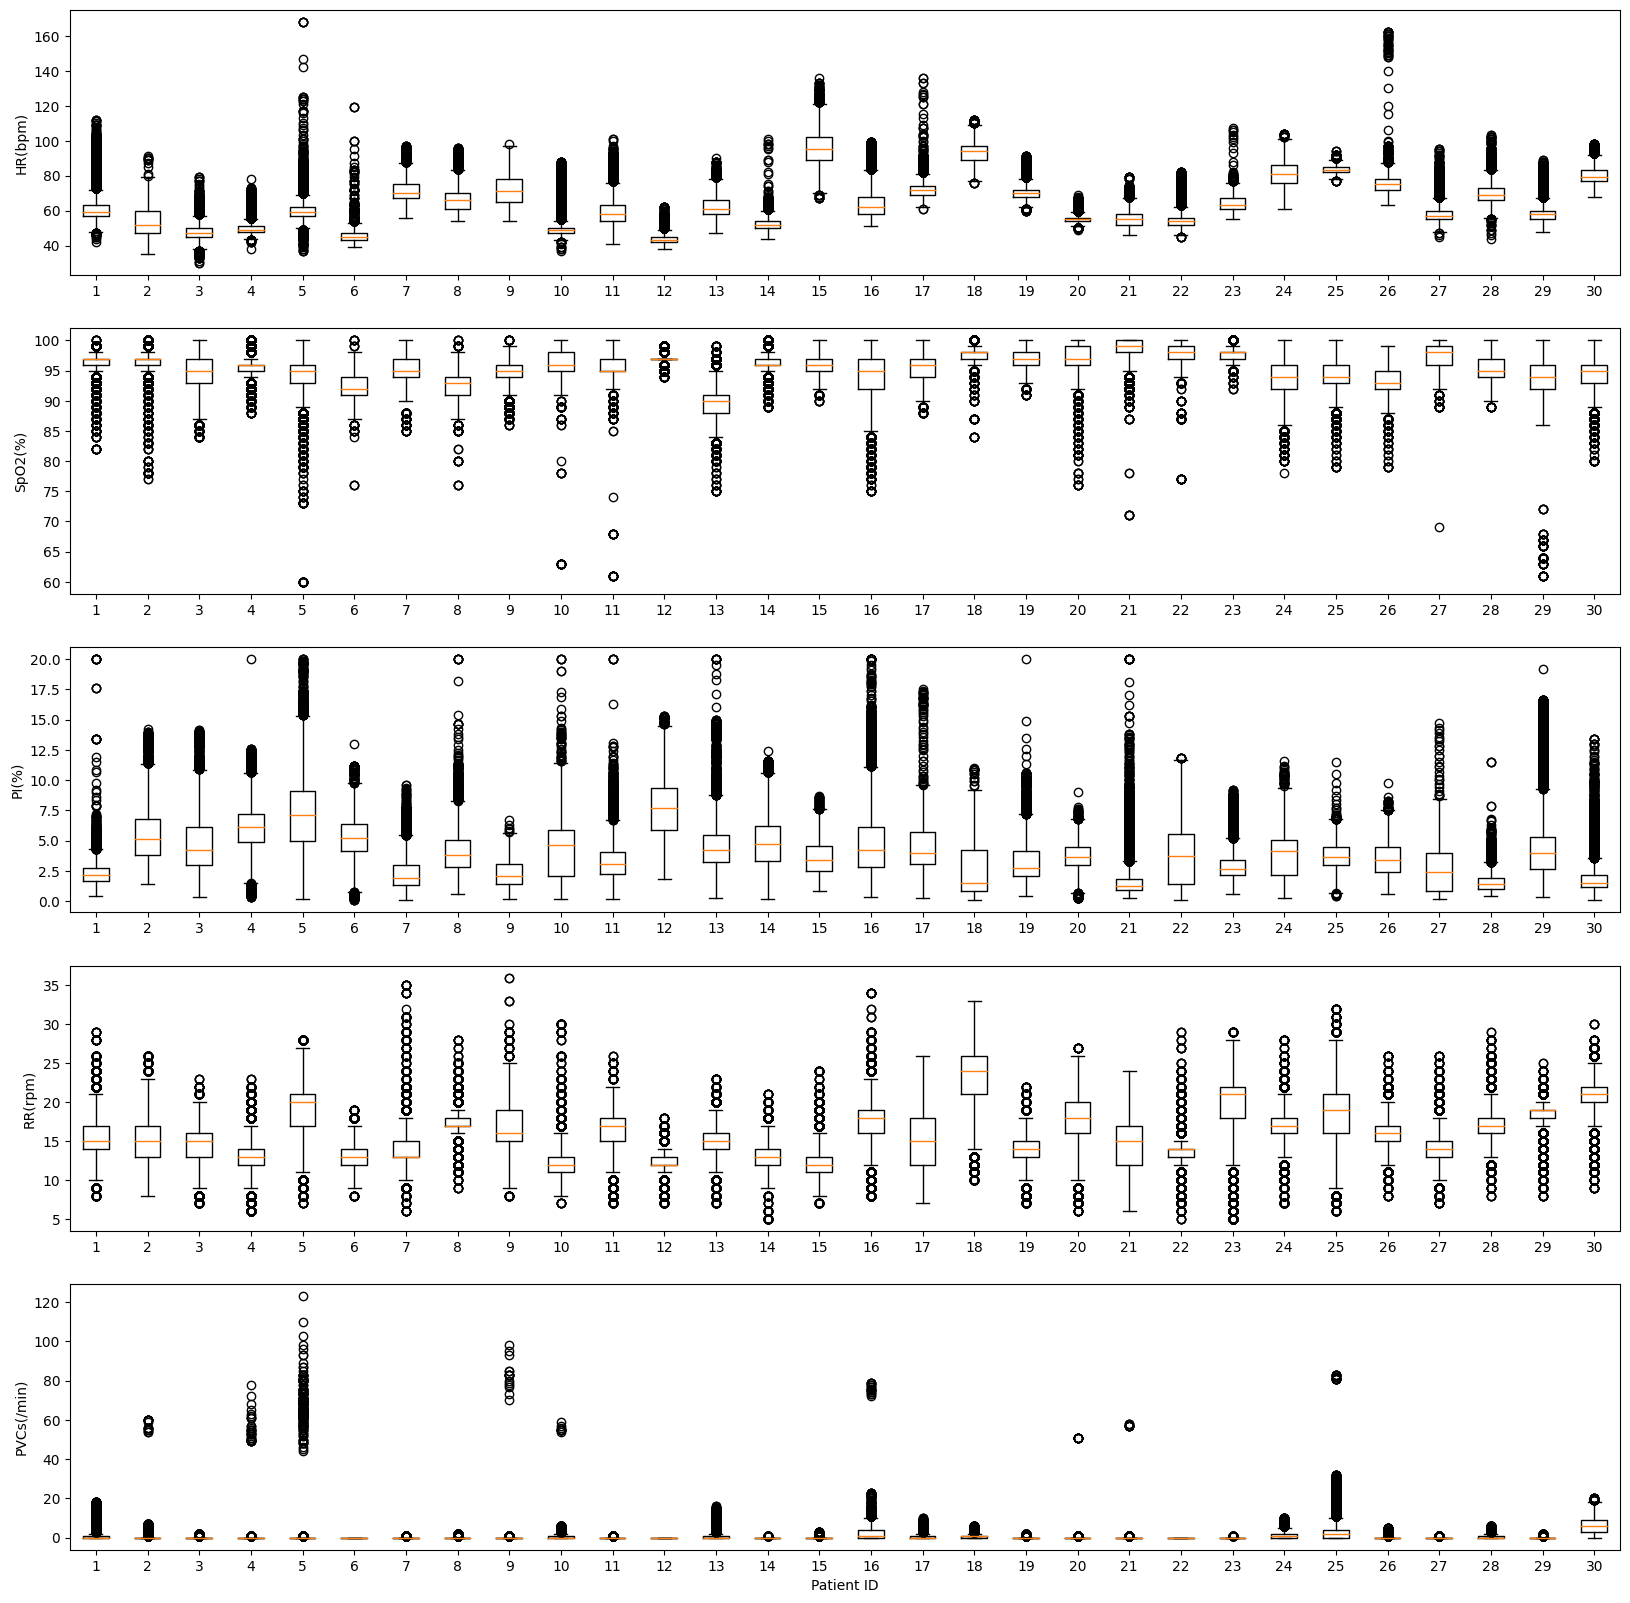

In [6]:
# Print some validation results

print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])
print("Number of distinct patients:", len(dataset['patient'].unique()))



# Function that, given an array of boolean values, outputs the "begin_index" and "end_index" of each contiguous block of TRUEs
def one_runs(a):
    iszero = np.concatenate(([0], np.equal(a, 1).astype(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges




# Calculate validation data for each patient
validation_pandas = []
pbar = tqdm(desc="Processed patients", total=len(dataset['patient'].unique()))
for pat in np.unique(dataset['patient'])[np.argsort(np.unique(dataset['patient']).astype(np.int8))]:
    temp = dataset[dataset['patient'] == pat]

    tmp_null_pleth = np.asarray([np.isnan(x) for x in temp['signal_pleth']]).flatten()
    tmp_null_ecg_i = np.asarray([np.isnan(x) for x in temp['signal_ecg_i']]).flatten()
    tmp_null_ecg_ii = np.asarray([np.isnan(x) for x in temp['signal_ecg_ii']]).flatten()
    tmp_null_ecg_iii = np.asarray([np.isnan(x) for x in temp['signal_ecg_iii']]).flatten()
    
    pandas_row = [pat, # patient ID
                  round(len(temp) / 3600, 1), # recording duration (hours)
                  round(len(one_runs(temp['anomaly'].values)) / (len(temp) / 3600), 1), # AHI 
                  len(one_runs(temp[temp['event'] != 'HYPOPNEA']['anomaly'])), # number of apnea events
                  len(one_runs(temp[(temp['event'] == 'HYPOPNEA') | (temp['event'] == 'NONE')]['anomaly'])), # number of hypopnea events
                  round(np.mean([x[1] - x[0] + 1 for x in one_runs(temp['anomaly'].values)])), # average duration of (hypo)apnea events (seconds)
                  round(np.std([x[1] - x[0] + 1 for x in one_runs(temp['anomaly'].values)])), # standard deviation of the duration of (hypo)apnea events (seconds)
                  round(100 * np.sum(np.isnan(temp['HR(bpm)'])) / len(temp), 1), # percentage of null HR values
                  round(100 * np.sum(np.isnan(temp['SpO2(%)'])) / len(temp), 1), # percentage of null SpO2 values
                  round(100 * np.sum(np.isnan(temp['PI(%)'])) / len(temp), 1), # percentage of null PI values
                  round(100 * np.sum(np.isnan(temp['RR(rpm)'])) / len(temp), 1), # percentage of null RR values
                  round(100 * np.sum(np.isnan(temp['PVCs(/min)'])) / len(temp), 1), # percentage of null PVC values
                  round(100 * np.sum(tmp_null_pleth) / len(tmp_null_pleth), 1), # percentage of null pleth values,
                  round(100 * np.sum(tmp_null_ecg_i) / len(tmp_null_ecg_i), 1), # percentage of null ecg i values,
                  round(100 * np.sum(tmp_null_ecg_ii) / len(tmp_null_ecg_ii), 1), # percentage of null ecg ii values,
                  round(100 * np.sum(tmp_null_ecg_iii) / len(tmp_null_ecg_iii), 1), # percentage of null ecg iii values
                 ]
    
    validation_pandas.append(pandas_row)
    
    pbar.update(1)
    
        
validation_pandas = pd.DataFrame(validation_pandas, columns=['patient', 
                                                             'recording duration (hrs)', 
                                                             'AHI', 
                                                             '# apnea events', 
                                                             '# hypopnea events', 
                                                             'avg duration (hypo)apnea events',
                                                             'stddev duration (hypo)apnea events',
                                                             '% null HR',
                                                             '% null SpO2',
                                                             '% null PI', 
                                                             '% null RR', 
                                                             '% null PVC',
                                                             '% null pleth',
                                                             '% null ecg i',
                                                             '% null ecg ii',
                                                             '% null ecg iii'
                                                            ])

display(validation_pandas)




# Boxplots of the ECG and PPG derived data
plt.figure(figsize=(20, 20))
pbar = tqdm(desc="Processed features", total=5)
for i, column in enumerate(['HR(bpm)', 'SpO2(%)', 'PI(%)', 'RR(rpm)', 'PVCs(/min)']):
    plt.subplot(5, 1, i+1)
    plot_data = []
    for pat in np.unique(dataset['patient'])[np.argsort(np.unique(dataset['patient']).astype(np.int8))]:
        temp = dataset[dataset['patient'] == pat][column]
        plot_data.append([x for x in list(temp.values) if not np.isnan(x)])
    plt.boxplot(plot_data)
    if i == 4:
        plt.xlabel("Patient ID")
    plt.ylabel(column)
    pbar.update(1)
pbar.close()
plt.show()
        
    

(814323, 18)

In [4]:
dataset = dataset.dropna(inplace=False)

Processed features:   0%|          | 0/5 [00:00<?, ?it/s]

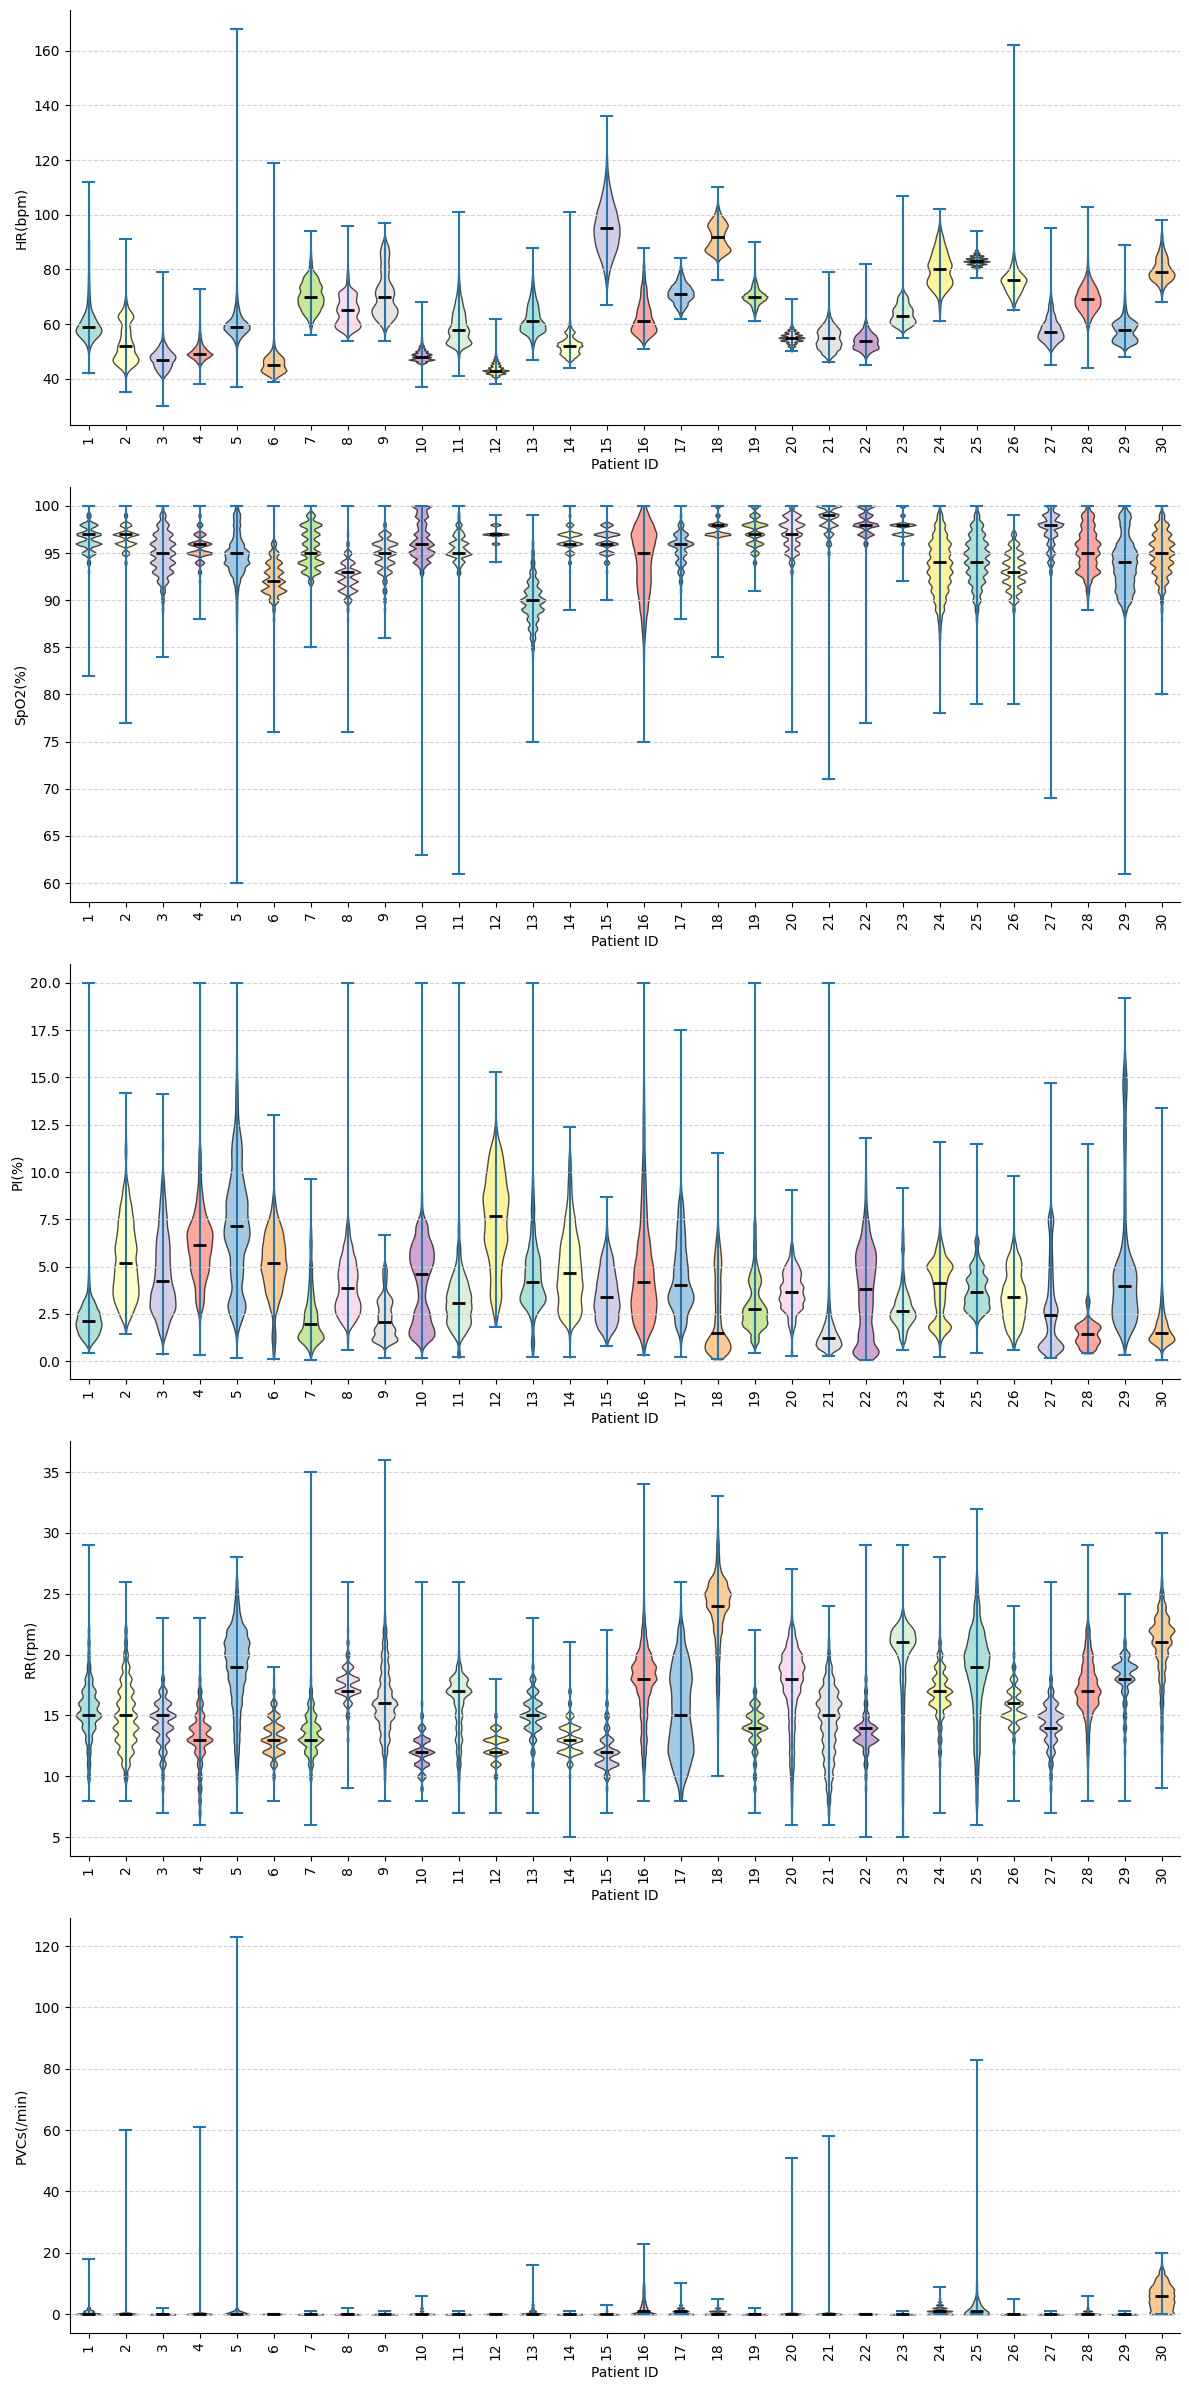

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 24))
pbar = tqdm(desc="Processed features", total=5)

# Set up a color palette for the violin plots
colors = sns.color_palette("Set3", len(np.unique(dataset['patient'])))

for i, column in enumerate(['HR(bpm)', 'SpO2(%)', 'PI(%)', 'RR(rpm)', 'PVCs(/min)']):
    ax = plt.subplot(5, 1, i+1)

    plot_data = []
    patient_ids = np.unique(dataset['patient'])[np.argsort(np.unique(dataset['patient']).astype(np.int8))]

    for pat in patient_ids:
        temp = dataset[dataset['patient'] == pat][column]
        plot_data.append([x for x in list(temp.values) if not np.isnan(x)])

    parts = ax.violinplot(plot_data, showmedians=True, widths=0.7)

    # Customize the violin plot elements
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)

    parts['cmedians'].set_color('black')
    parts['cmedians'].set_linewidth(2)

    # Customize plot appearance
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='dashed', color='lightgray')
    ax.set_xlabel("Patient ID")
    ax.set_ylabel(column)
    ax.set_xticks(np.arange(1, len(patient_ids) + 1))
    ax.set_xticklabels(patient_ids, rotation=90)
    ax.set_xlim(0.5, len(patient_ids) + 0.5)

    pbar.update(1)

pbar.close()
plt.tight_layout()
plt.show()


In [4]:
dataset.columns

Index(['patient', 'timestamp_datetime', 'HR(bpm)', 'SpO2(%)', 'PI(%)',
       'RR(rpm)', 'PVCs(/min)', 'event', 'anomaly', 'signal_pleth',
       'signal_ecg_i', 'signal_ecg_ii', 'signal_ecg_iii', 'PSG_Abdomen',
       'PSG_Flow', 'PSG_Position', 'PSG_Snore', 'PSG_Thorax'],
      dtype='object')

Processed patients:   0%|          | 0/30 [00:00<?, ?it/s]

['2019-07-29T21:00:36.000000000' '2019-07-29T21:00:37.000000000'
 '2019-07-29T21:00:38.000000000' '2019-07-29T21:00:39.000000000'
 '2019-07-29T21:00:40.000000000']


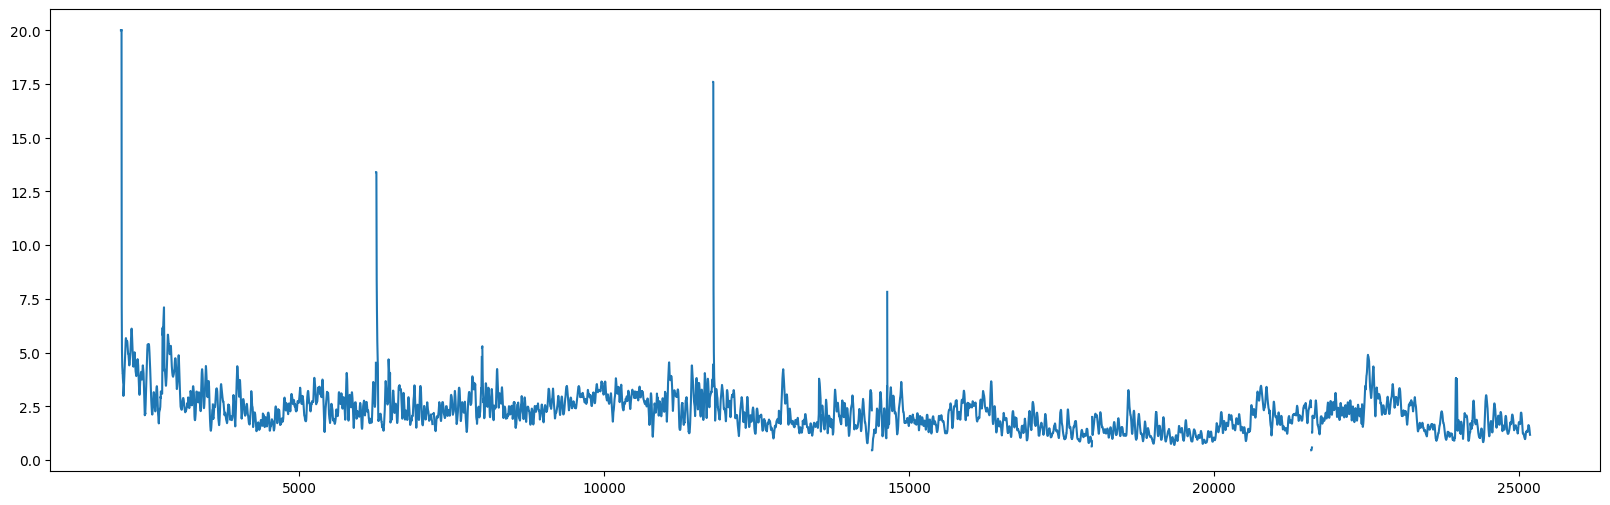

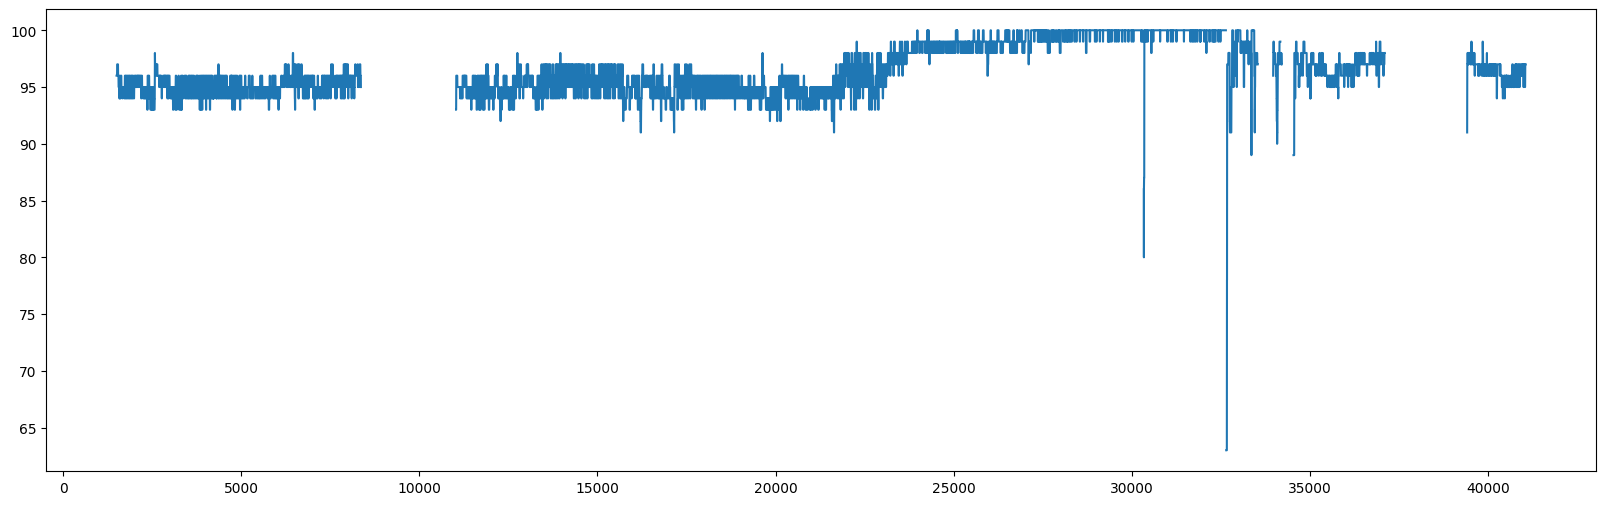

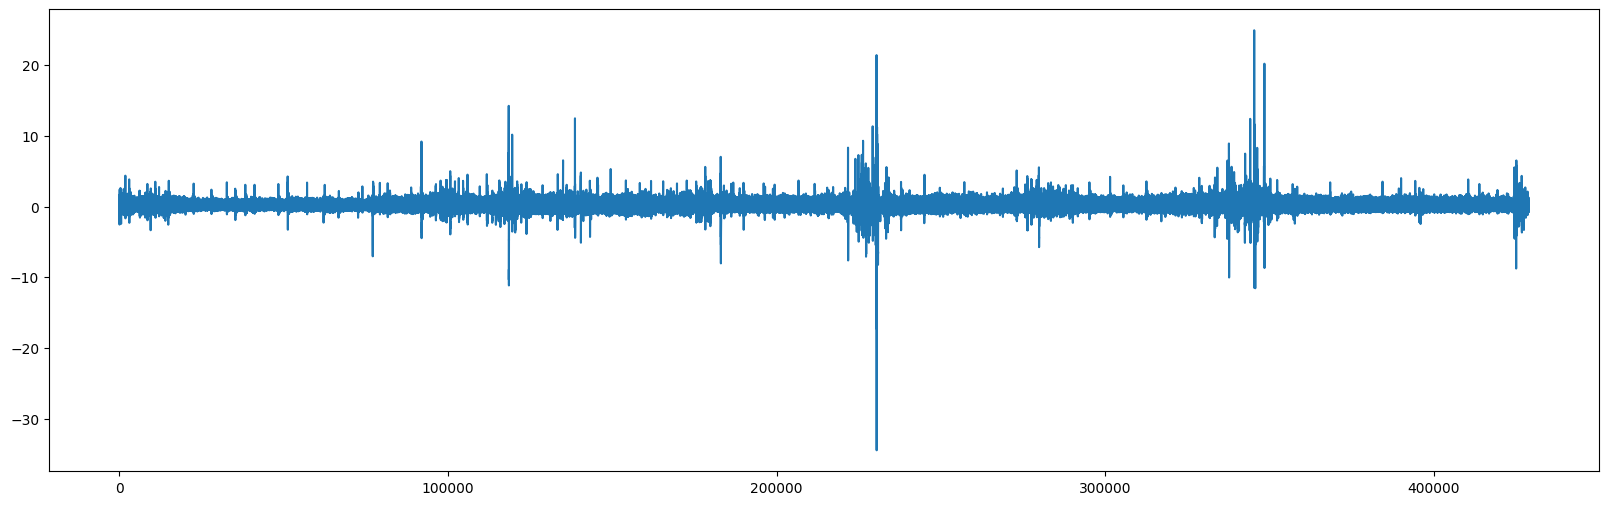

In [4]:
# The following code re-assembles the time series related to each patient

patient_map_features = {} # given a patient, the map returns a map that, given feature, returns its whole time series
pbar = tqdm(desc="Processed patients", total=len(dataset['patient'].unique()))
for pat in dataset['patient'].unique():
    temp = dataset[dataset['patient'] == pat]
    feature_map_ts = {}
    for col in dataset.columns[1:]:
        if 'signal' not in col and 'PSG_' not in col:
            feature_map_ts[col] = temp[col].values
        else:
            feature_map_ts[col] = np.concatenate(temp[col].values)
    patient_map_features[pat] = feature_map_ts
    pbar.update(1)
pbar.close()


print(patient_map_features['1']['timestamp_datetime'][:5]) # for example, here are the first 5 timetamp values related to patient '1'


# PI time series of patient 1. Observe that there are some outlier values that might be usefult correcting, for example using a weighting average approach.
plt.figure(figsize=(20, 6))
plt.plot(patient_map_features['1']['PI(%)'])
plt.show()


# Missing data in patient 10's SpO2 time series
plt.figure(figsize=(20, 6))
plt.plot(patient_map_features['10']['SpO2(%)'])
plt.show()


# Outliers produced by movements in patient 10's PSG_Abdomen time series
plt.figure(figsize=(20, 6))
plt.plot(patient_map_features['2']['PSG_Abdomen'])
plt.show()


In [12]:
dataset.columns

Index(['patient', 'timestamp_datetime', 'HR(bpm)', 'SpO2(%)', 'PI(%)',
       'RR(rpm)', 'PVCs(/min)', 'event', 'anomaly', 'signal_pleth',
       'signal_ecg_i', 'signal_ecg_ii', 'signal_ecg_iii', 'PSG_Abdomen',
       'PSG_Flow', 'PSG_Position', 'PSG_Snore', 'PSG_Thorax'],
      dtype='object')

In [5]:
# The following code generates a set of numpy arrays that can be used for machine learning purposes
# Each row of every numpy array contains information related to windows of length "window_seconds"
# Here, "PSG_" signal data is not considered

window_seconds = 1 # length, in seconds, of each data window. Here, windows are disjoint, but it might be useful to generate overlapping windows so to consider 

derived_data = [] # will be a numpy array containing ECG and PPG derived data
waveform_data = [] # will be a numpy array containing ECG and PPG waveform data
label_data = [] # will be a numpy array containing the "event" and anomaly" data labels

list_patients = [] # list that keeps track of the patient ID for each row in the arrays
list_derived_columns = [] # list that keeps track of the column names in the derived_data numpy array (last dimension)
list_waveform_columns = [] # list that keeps track of the column names in the waveform_data numpy array (last dimension)
list_label_columns = [] # list that keeps track of the column names in the label_data numpy array (last dimension)


pbar = tqdm(desc="Processed patients", total=len(dataset['patient'].unique()))
for pat in patient_map_features.keys():
    num_values = len(patient_map_features[pat]['HR(bpm)'])
    max_values = (num_values // window_seconds) * window_seconds
#     print("Patient", pat, " >  Discarding the last", num_values - max_values, 'seconds.')
    
    # Derived data
    temp_list_derived = []
    derived_colnames = []
    for col in patient_map_features[pat]:
        if np.any([x == col for x in ['HR(bpm)', 'SpO2(%)', 'PI(%)', 'RR(rpm)', 'PVCs(/min)']]):
            temp_list_derived.append(np.asarray(patient_map_features[pat][col][:max_values]).reshape(-1, window_seconds))
            derived_colnames.append(col)
#     print('=================================')
#     print(np.asarray(temp_list_derived).shape)
    temp_list_derived = np.moveaxis(np.asarray(temp_list_derived), [0, 1, 2], [2, 0, 1])
#     print(temp_list_derived.shape)
#     print('=================================')
#     break
    derived_data.append(temp_list_derived)
    if len(list_derived_columns) == 0:
        list_derived_columns = derived_colnames
    
    # Waveform data
    temp_list_waveform = []
    waveform_colnames = []
    for col in patient_map_features[pat]:
        if 'signal' in col:
            temp_list_waveform.append(np.asarray(patient_map_features[pat][col][:max_values*80]).reshape(-1, window_seconds, 80))
            waveform_colnames.append(col)
    temp_list_waveform = np.moveaxis(np.asarray(temp_list_waveform), [0, 1, 2, 3], [3, 0, 1, 2])
    waveform_data.append(temp_list_waveform)    
    if len(list_waveform_columns) == 0:
        list_waveform_columns = waveform_colnames
    
    # Label data
    temp_list_label = []
    label_colnames = []
    for col in patient_map_features[pat]:
        if col == 'anomaly' or col == 'event':
            temp_list_label.append(np.asarray(patient_map_features[pat][col][:max_values]).reshape(-1, window_seconds))
            label_colnames.append(col)
    temp_list_label = np.moveaxis(np.asarray(temp_list_label), [0, 1, 2], [2, 0, 1])
    label_data.append(temp_list_label)
    if len(list_label_columns) == 0:
        list_label_columns = label_colnames
    
    # Auxiliary data that keeps track of the patient related to each row
#     print("list_patients  -- ", np.asarray(list_patients).shape)
#     print("temp_list_derived  -- ", temp_list_derived.shape[0])
    list_patients.extend([pat] * temp_list_derived.shape[0])
    
    
    pbar.update(1)
pbar.close()
    
    
derived_data = np.vstack(derived_data) # 16008 windows, of 60 seconds each, for 5 attributes
waveform_data = np.vstack(waveform_data) # 16008 windows, of 60 seconds each, 80 values per second, for 4 attributes
label_data = np.vstack(label_data) # 16008 windows, of 60 seconds each, for 2 labels
label_data = label_data[:, :, -1].astype(int)

waveform_data = np.squeeze(waveform_data)
derived_data = np.squeeze(derived_data)
label_data = np.squeeze(label_data)

print(derived_data.shape, waveform_data.shape, label_data.shape)
# print(len(list_patients), len(list_derived_columns), len(list_waveform_columns), len(list_label_columns))

Processed patients:   0%|          | 0/30 [00:00<?, ?it/s]

(961357, 5) (961357, 80, 4) (961357,)


In [9]:
np.isnan(label_data).any()

False

In [7]:
has_nan = np.isnan(waveform_data).any(axis=(1, 2))

waveform_data = waveform_data[~has_nan]
derived_data = derived_data[~has_nan]
label_data = label_data[~has_nan]

In [8]:
has_nan = np.isnan(derived_data).any(axis=(1))

waveform_data = waveform_data[~has_nan]
derived_data = derived_data[~has_nan]
label_data = label_data[~has_nan]

In [10]:
waveform_data.shape, derived_data.shape, label_data.shape

((790614, 80, 4), (790614, 5), (790614,))

In [11]:
waveform_data.shape, derived_data.shape, label_data.shape

((790614, 80, 4), (790614, 5), (790614,))

In [12]:
# Separate data and y based on y values
waveform_data_0 = waveform_data[label_data == 0]
derived_data_0 = derived_data[label_data == 0]
label_data_0 = label_data[label_data == 0]

waveform_data_1 = waveform_data[label_data == 1]
derived_data_1 = derived_data[label_data == 1]
label_data_1 = label_data[label_data == 1]

# Verify the shapes of the separated data and y
print("Waveform with label = 0 shape:", waveform_data_0.shape)
print("Derived with label = 0 shape:", derived_data_0.shape)
print("Label with label = 0 shape:", label_data_0.shape)

print("Waveform with label = 1 shape:", waveform_data_1.shape)
print("Derived with label = 1 shape:", derived_data_1.shape)
print("Label with label = 1 shape:", label_data_1.shape)

Waveform with label = 0 shape: (664433, 80, 4)
Derived with label = 0 shape: (664433, 5)
Label with label = 0 shape: (664433,)
Waveform with label = 1 shape: (126181, 80, 4)
Derived with label = 1 shape: (126181, 5)
Label with label = 1 shape: (126181,)


In [13]:
num_samples = label_data_1.shape[0]

# Generate random indices to select from the data
random_indices = np.random.choice(waveform_data_0.shape[0], size=num_samples, replace=False)

# Select the corresponding samples from data and y
waveform_selected = waveform_data_0[random_indices]
derived_selected = derived_data_0[random_indices]
label_selected = label_data_0[random_indices]

# Verify the shape of the selected data and y
print("Selected waveform shape:", waveform_selected.shape)
print("Selected derived shape:", derived_selected.shape)
print("Selected label shape:", label_selected.shape)

Selected waveform shape: (126181, 80, 4)
Selected derived shape: (126181, 5)
Selected label shape: (126181,)


In [14]:
concatenated_waveform = np.concatenate((waveform_selected, waveform_data_1), axis=0)
concatenated_derived = np.concatenate((derived_selected, derived_data_1), axis=0)
concatenated_label = np.concatenate((label_selected, label_data_1), axis=0)
# Verify the shape of the concatenated data
print("Concatenated waveform shape:", concatenated_waveform.shape)
print("Concatenated derived shape:", concatenated_derived.shape)
print("Concatenated label shape:", concatenated_label.shape)

Concatenated waveform shape: (252362, 80, 4)
Concatenated derived shape: (252362, 5)
Concatenated label shape: (252362,)


In [22]:
from sklearn.preprocessing import StandardScaler

shape = concatenated_waveform.shape
reshaped_data = np.reshape(concatenated_waveform, (shape[0], -1))

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(reshaped_data)

# Transform the data to have zero mean and unit standard deviation
scaled_data = scaler.transform(reshaped_data)

# Reshape the scaled data back to its original shape
scaled_waveform = np.reshape(scaled_data, shape)

In [23]:
from sklearn.preprocessing import StandardScaler

shape = concatenated_derived.shape
reshaped_data = np.reshape(concatenated_derived, (shape[0], -1))

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(reshaped_data)

# Transform the data to have zero mean and unit standard deviation
scaled_data = scaler.transform(reshaped_data)

# Reshape the scaled data back to its original shape
scaled_derived = np.reshape(scaled_data, shape)

In [25]:
# Create an array of indices to shuffle the data
indices = np.arange(len(scaled_waveform))

# Shuffle the indices
np.random.shuffle(indices)

# Shuffle the data using the shuffled indices
shuffled_waveform = scaled_waveform[indices]
shuffled_derived = scaled_derived[indices]
shuffled_label = concatenated_label[indices]

# Print the shape of the shuffled data
print("Shuffled waveform shape:", shuffled_waveform.shape)
print("Shuffled derived shape:", shuffled_derived.shape)
print("Shuffled label shape:", shuffled_label.shape)

Shuffled waveform shape: (252362, 80, 4)
Shuffled derived shape: (252362, 5)
Shuffled label shape: (252362,)


In [26]:
with open('waveform.pkl', 'wb') as file:
    pickle.dump(shuffled_waveform, file)

In [27]:
with open('derived.pkl', 'wb') as file:
    pickle.dump(shuffled_derived, file)

In [28]:
with open('label.pkl', 'wb') as file:
    pickle.dump(shuffled_label, file)